In [1]:
# Import du jeu de donnée
import pandas as pd
import numpy as np

# copy on write

df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
# On affiche les colonnes
df.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  ...    ph_100g  \
count  2.611130e+05            857.000000  243891.000000  ...  49.000000   
mean   1.141915e+03            585.501214      12.730379  ...   6.425698   
std    6.447154e+03            712.809943      17.578747  ...   2.047841   
min    0.000000e+00              0.000000       0.000000  ...   0.000000   
25%    3.770000e+02             49.400000       0.000000  ...   6.300000   
50%    1.100000e+03            300.000000       5.000000  ...   7.200000   
75%    1.674000e+03            898.000000      20.000000  ...   7.400000   
max    3.251373e+06           3830.000000     714.290000  ...   8.400000   

       fruits-vegetables-nuts_100g  collagen-meat-protein-ratio_100g  \
count                  3036.000000                        165.000000   
mean                     31.458587                         15.412121   
std                      31.967918                          3.753028   
min                       0.000000                          8.000000   
25%                       0.000000                         12.000000   
50%                      23.000000                         15.000000   
75%                      51.000000                         15.000000   
max                     100.000000                         25.000000   

       cocoa_100g  chlorophyl_100g  carbon-footprint_100g  \
count  948.000000              0.0             268.000000   
mean    49.547785              NaN             341.700764   
std     18.757932              NaN             425.211439   
min      6.000000              NaN               0.000000   
25%     32.000000              NaN              98.750000   
50%     50.000000              NaN             195.750000   
75%     64.250000              NaN             383.200000   
max    100.000000              NaN            2842.000000   

       nutrition-score-fr_100g  nutrition-score-uk_100g  glycemic-index_100g  \
count            221210.000000            221210.000000                  0.0   
mean                  9.165535             

<Axes: >

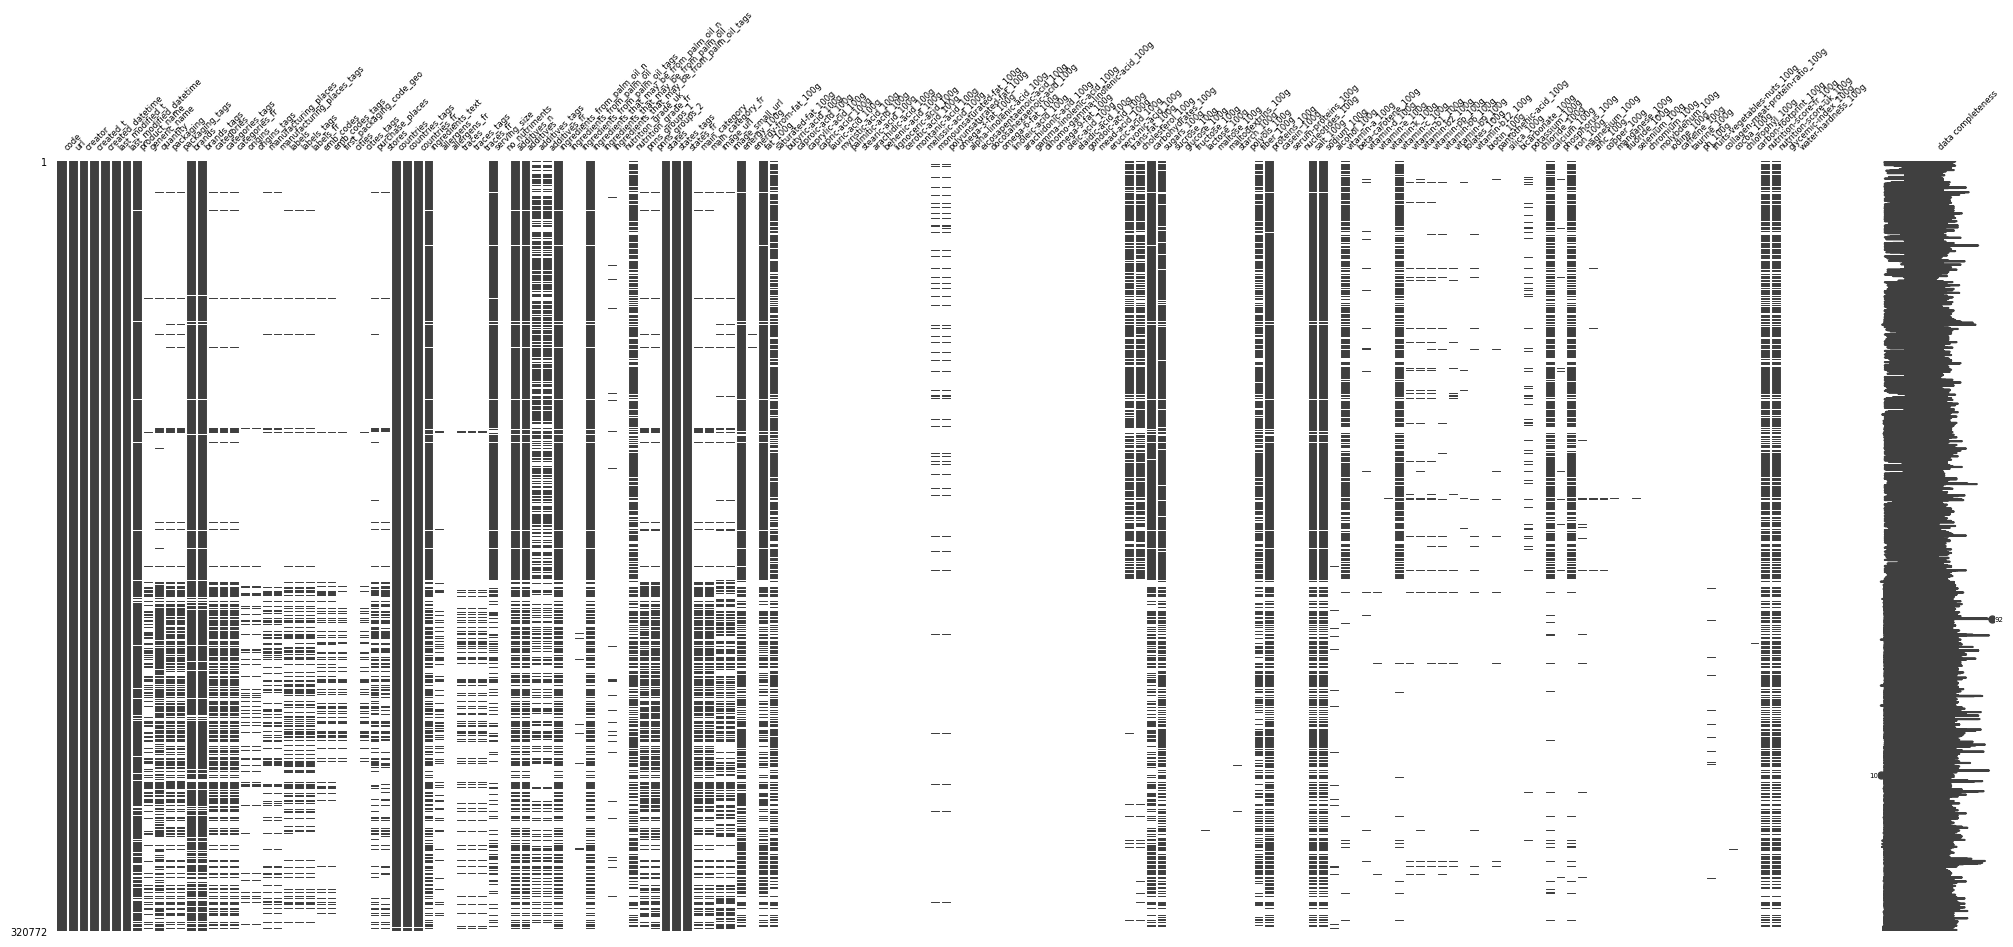

In [2]:
# missingno matrice avec label
import missingno as msno
msno.matrix(df, labels=True, fontsize=6)

<Axes: >

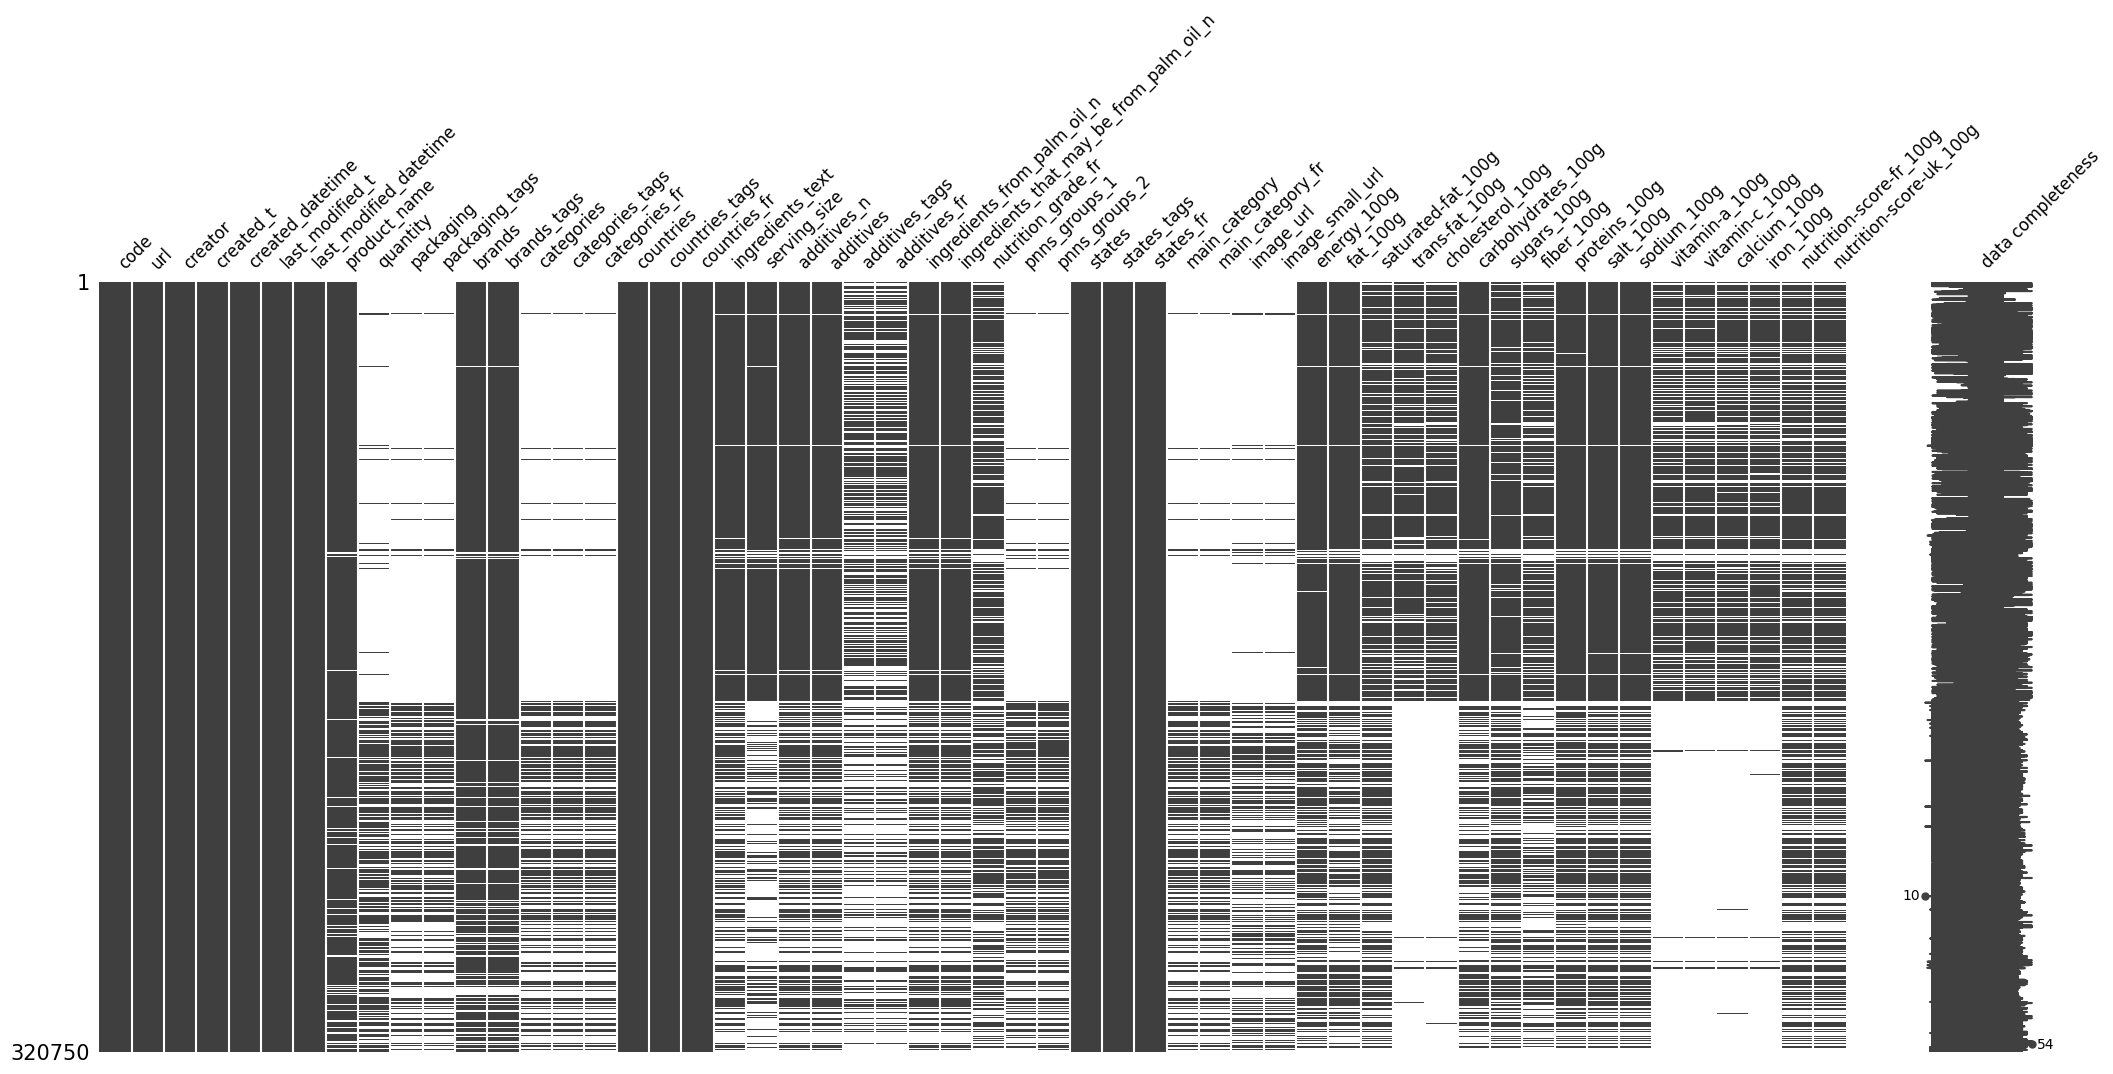

In [3]:
# On enlève les colonnes avec moins de 10% de valeurs présentes
df2_under_10 = df.dropna(thresh=0.2*df.shape[0], axis=1)
# On retire les doublons pour la catégorie code et on garde le premier
df2_under_10 = df2_under_10.drop_duplicates(subset='code', keep='first')
# On affiche les colonnes
msno.matrix(df2_under_10, labels=True, fontsize=12)

In [4]:
# Les pnns_groups_1 regroupe les différentes catégories de produits, cependant tout n'est pas orthographié de la même manière
df3_pnns = df2_under_10.copy()

# Nettoyage des valeurs de pnns_groups_1, enlever les - et mettre en majuscule, remplacer Unknown par NaN
df3_pnns['pnns_groups_1'] = df3_pnns['pnns_groups_1'].str.replace('-',' ').str.capitalize().replace('Unknown',np.nan)

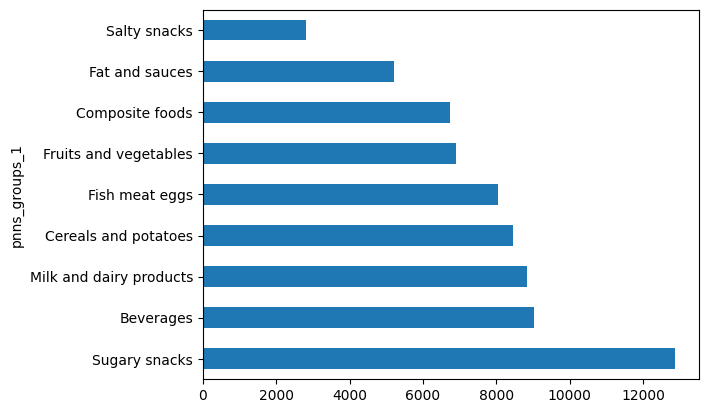

In [5]:
# Graphique
import matplotlib.pyplot as plt
df3_pnns['pnns_groups_1'].value_counts().plot(kind='barh')
plt.show()


Nous allons réaliser des box plots en fonction des data que nous avons et par catégorie pour voir si l'on peut prédire le jeu de donnée. A en juger par la matrice de missing no. Une bonne moitié d'entre eux sont présent malgré la présence des _100g. Peut être qu'une méthode de regression logistique pourrait fonctionner. On va réaliser quelques analyses complémentaires pour voir à l'oeil s'il y a quelques variations visuellement intéressantes.

<Axes: >

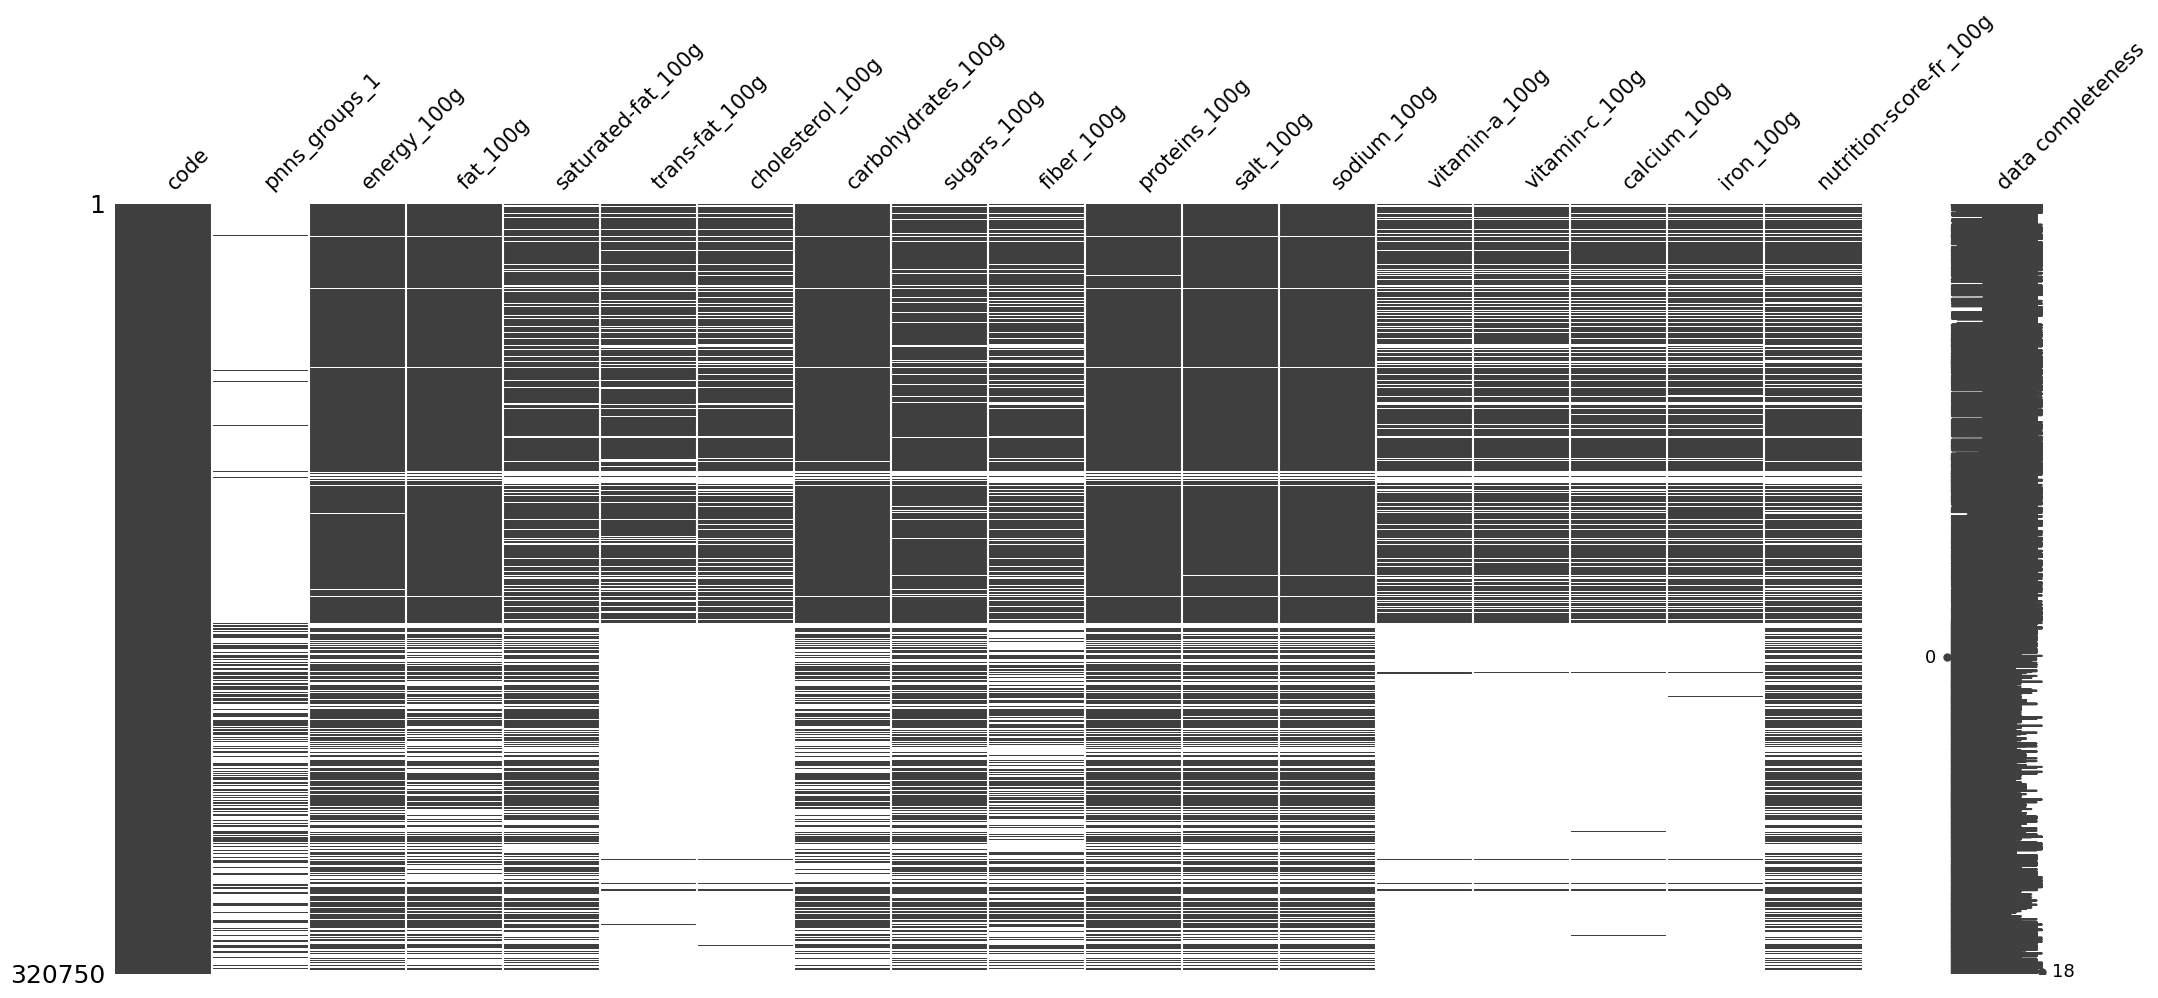

In [6]:
# Se débarasser des valeurs que l'on utilisera pas pour notre analyse (J'ai déjà réalisé le boxplot avec df3_pnns avant, et certaines données ne servait à rien, j'ai donc décidé d'itérer les graphiques qui viendront après avec df4 et df5)
df4_drop = df3_pnns.drop(columns=['url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'nutrition-score-uk_100g'])
msno.matrix(df4_drop, labels=True, fontsize=15)

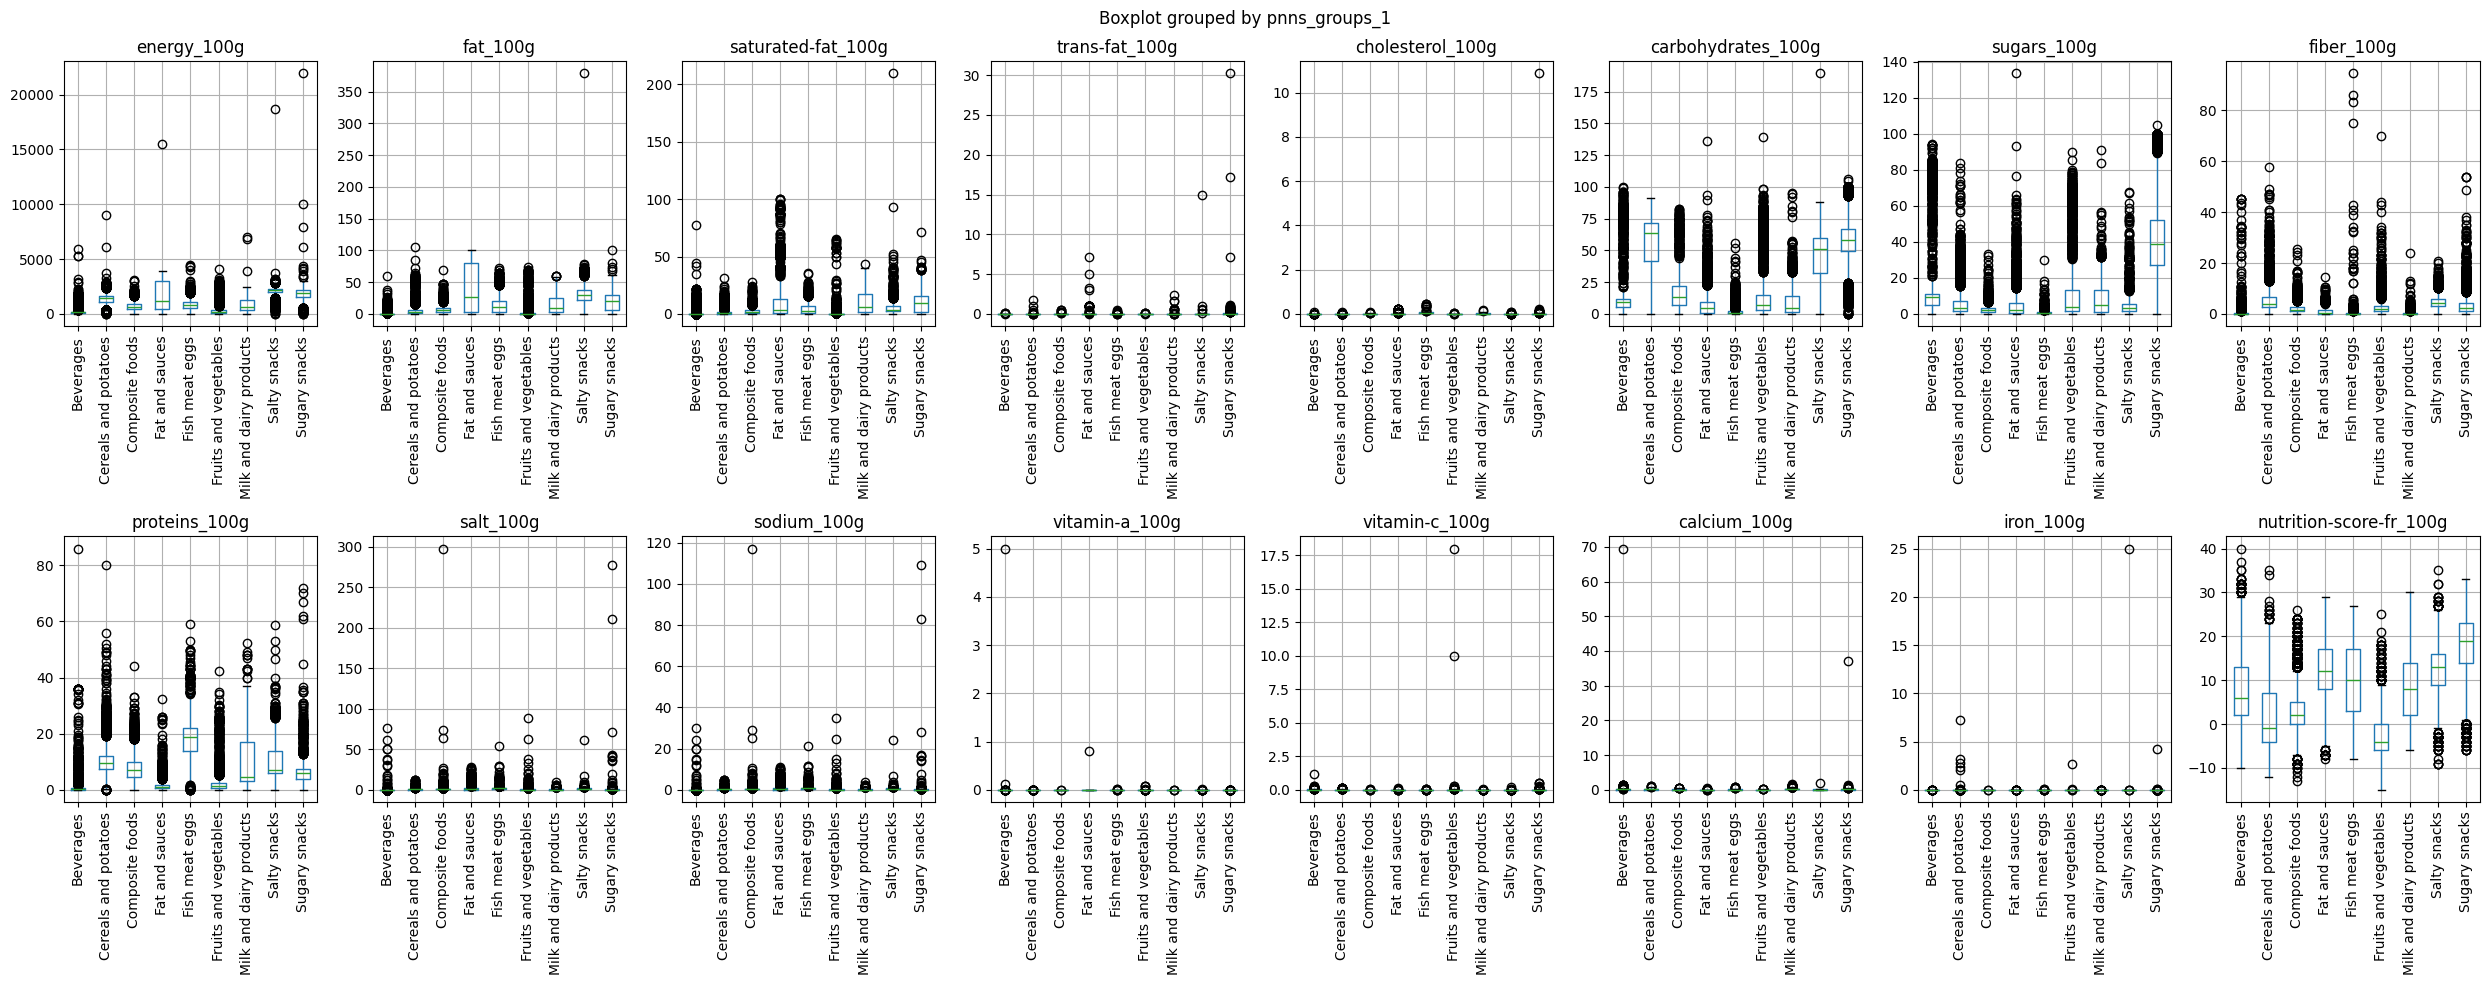

In [7]:
# Box plot pour chaque variable numérique et en fonction des catégories
import matplotlib.pyplot as plt

# Créations de variables pour afficher les boxplots en tableau et réduire l'espace occupé par les graphiques
num_cols = 8
num_rows = int(np.ceil(len(df4_drop.select_dtypes(include=['float64']).columns) / num_cols))


# Créer la figure et les axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))

# Aplatir les axes pour faciliter l'indexation
axes = axes.flatten()

# Boucle pour créer les boxplots
for i, col in enumerate(df4_drop.select_dtypes(include=['float64']).columns):
    df4_drop.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

# Supprimer les axes inutilisés
for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

# Afficher la figure
plt.tight_layout()
plt.show()

In [8]:
import numpy as np

df5_IQR = df4_drop.copy()

for category in df5_IQR['pnns_groups_1'].unique():
    category_data = df5_IQR[df5_IQR['pnns_groups_1'] == category]
    for col in df5_IQR.select_dtypes(include=['float64']).columns:
        Q1 = category_data[col].quantile(0.25)
        Q3 = category_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remplacement des valeurs aberrantes par NaN pour la catégorie et la colonne courantes
        df5_IQR.loc[(df5_IQR['pnns_groups_1'] == category) & 
                    ((df5_IQR[col] < lower_bound) | (df5_IQR[col] > upper_bound)), col] = np.nan

# On affiche le nombre de valeurs remplacées par NaN
print(f"Nombre de valeurs remplacées par NaN : {df5_IQR.isna().sum().sum()}")


Nombre de valeurs remplacées par NaN : 2147209


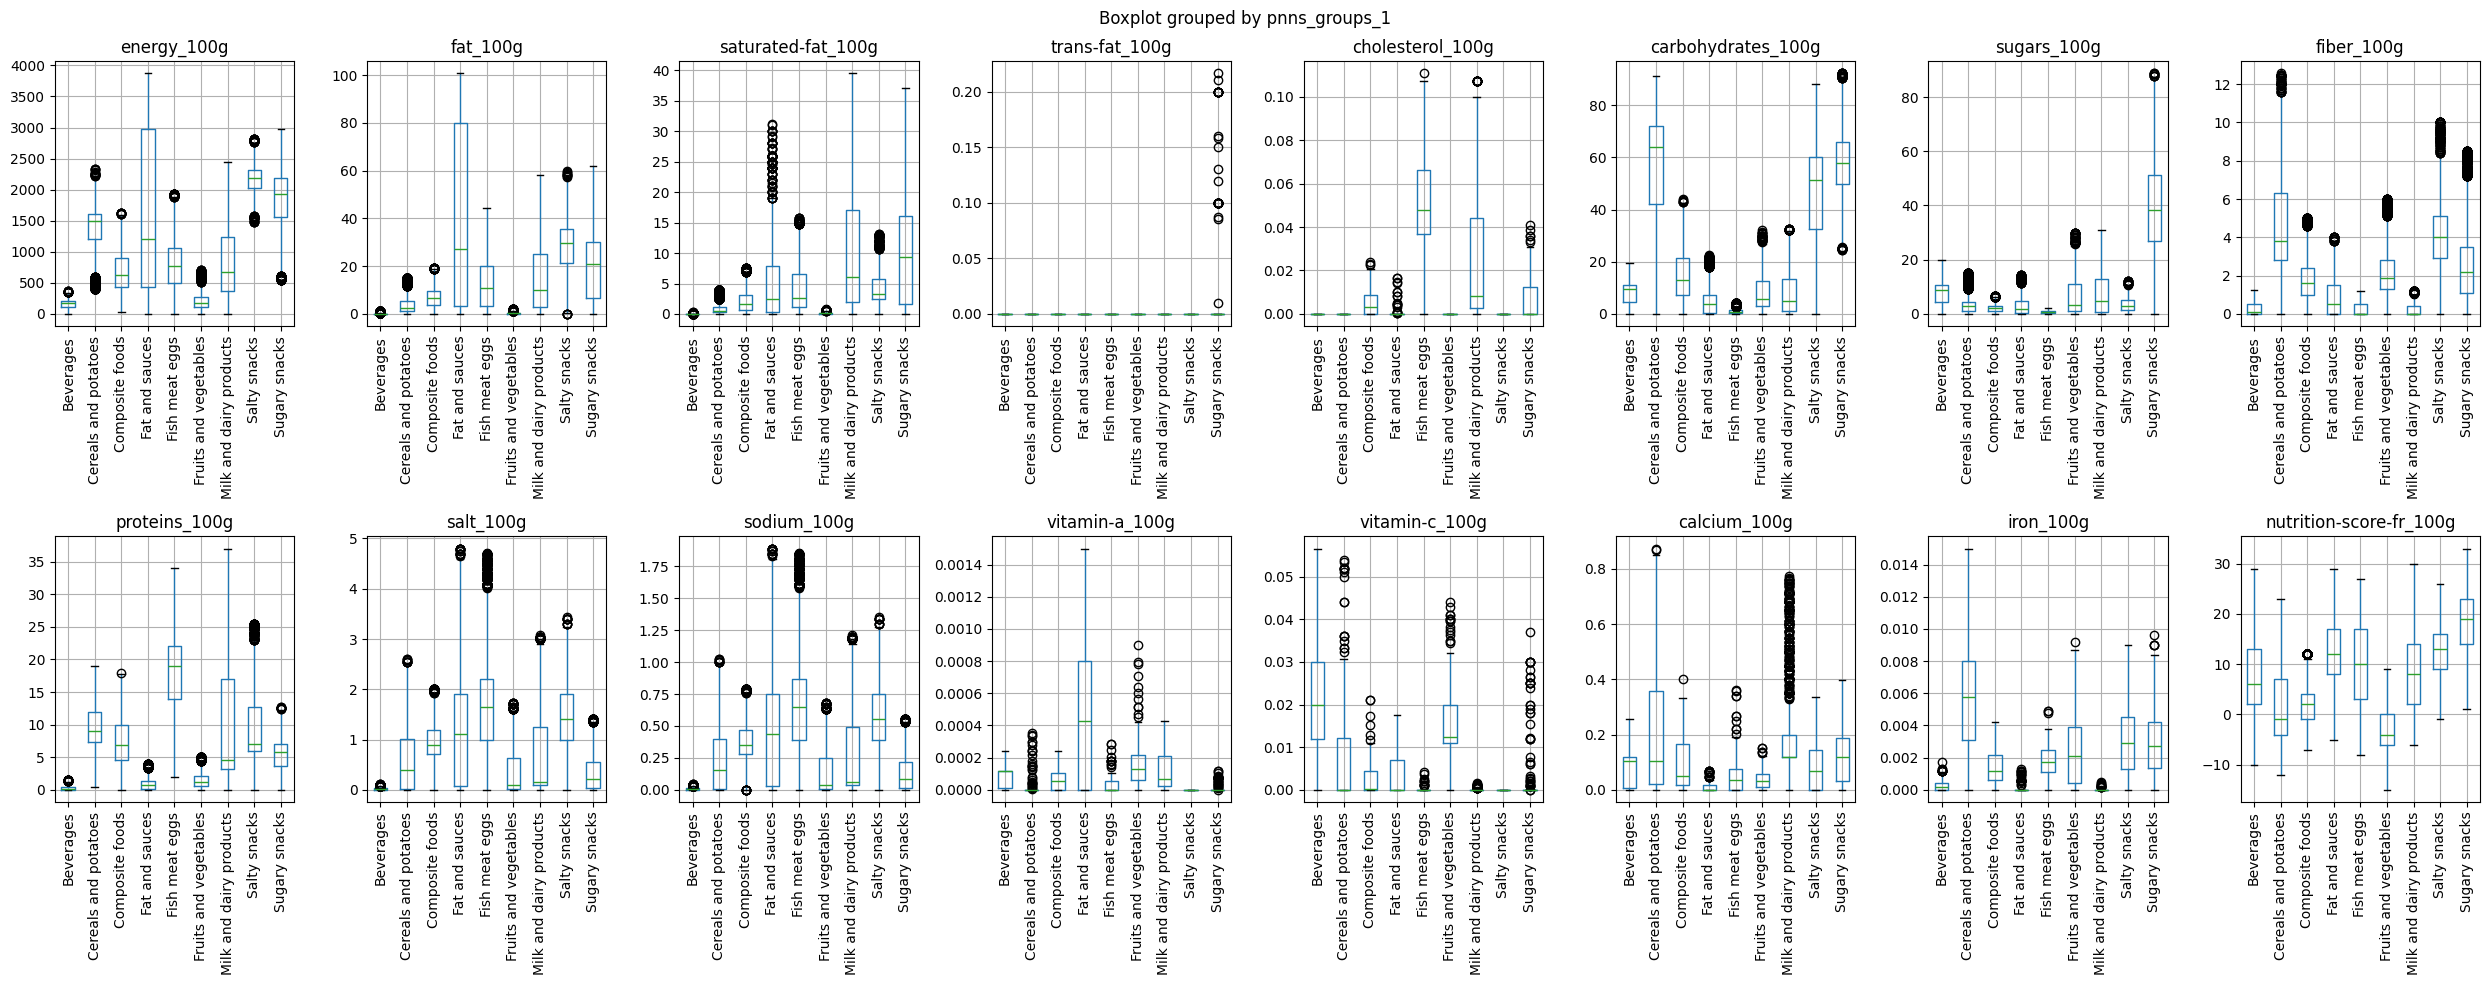

In [9]:
# On refait les boxplots avec df5_IQR
num_cols = 8
num_rows = int(np.ceil(len(df5_IQR.select_dtypes(include=['float64']).columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df5_IQR.select_dtypes(include=['float64']).columns):
    df5_IQR.boxplot(column=col, by='pnns_groups_1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelrotation=90)

for j in range(i+1, num_cols*num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()    

Après notre nettoyage, on peut voir qu'une très grande proportion des outliers ont correctement été remplacé par des NaN. C'est une bonne nouvelle car ça va améliorer la pertinence de l'analyse suivante. Qui nous permettra de créer je l'espère des pnns groups.

In [10]:
from sklearn.cluster import KMeans

# Initialisation du DataFrame pour K-means
df9_kmeans = df5_IQR.copy()

In [11]:
# Sélectionner uniquement les colonnes numériques se terminant par '_100g'
colonnes_numeriques = [col for col in df9_kmeans.columns if col.endswith('_100g')]

# Créer une copie du dataframe ne contenant que les colonnes sélectionnées et supprimer les NaN
X9 = df9_kmeans[colonnes_numeriques].dropna().copy()

In [13]:
# Remplacer les valeurs infinies par la médiane de la colonne
for col in X9.columns:
    X9[col] = X9[col].replace([np.inf, -np.inf], np.nan)
    X9[col] = X9[col].fillna(X9[col].median())


In [14]:
# Appliquer K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(X9)

# Aligner les labels de cluster avec l'index de df9_kmeans
df9_kmeans['cluster_kmeans'] = kmeans.predict(df9_kmeans[colonnes_numeriques].fillna(X9.median()))

# Imprimer les premières lignes avec les labels de cluster et les colonnes numériques
print(df9_kmeans[['cluster_kmeans'] + colonnes_numeriques].head().to_markdown(index=False, numalign="left", stralign="left"))


| cluster_kmeans   | energy_100g   | fat_100g   | saturated-fat_100g   | trans-fat_100g   | cholesterol_100g   | carbohydrates_100g   | sugars_100g   | fiber_100g   | proteins_100g   | salt_100g   | sodium_100g   | vitamin-a_100g   | vitamin-c_100g   | calcium_100g   | iron_100g   | nutrition-score-fr_100g   |
|:-----------------|:--------------|:-----------|:---------------------|:-----------------|:-------------------|:---------------------|:--------------|:-------------|:----------------|:------------|:--------------|:-----------------|:-----------------|:---------------|:------------|:--------------------------|
| 3                | nan           | nan        | nan                  | nan              | nan                | nan                  | nan           | nan          | nan             | nan         | nan           | nan              | nan              | nan            | nan         | nan                       |
| 2                | 2243          | 28.57      | 28.57         


Statistiques descriptives par cluster et groupe PNNS:
|                                | ('energy_100g', 'count')   | ('energy_100g', 'mean')   | ('energy_100g', 'std')   | ('energy_100g', 'min')   | ('energy_100g', '25%')   | ('energy_100g', '50%')   | ('energy_100g', '75%')   | ('energy_100g', 'max')   | ('fat_100g', 'count')   | ('fat_100g', 'mean')   | ('fat_100g', 'std')   | ('fat_100g', 'min')   | ('fat_100g', '25%')   | ('fat_100g', '50%')   | ('fat_100g', '75%')   | ('fat_100g', 'max')   | ('saturated-fat_100g', 'count')   | ('saturated-fat_100g', 'mean')   | ('saturated-fat_100g', 'std')   | ('saturated-fat_100g', 'min')   | ('saturated-fat_100g', '25%')   | ('saturated-fat_100g', '50%')   | ('saturated-fat_100g', '75%')   | ('saturated-fat_100g', 'max')   | ('trans-fat_100g', 'count')   | ('trans-fat_100g', 'mean')   | ('trans-fat_100g', 'std')   | ('trans-fat_100g', 'min')   | ('trans-fat_100g', '25%')   | ('trans-fat_100g', '50%')   | ('trans-fat_100g', '75%')   | ('trans-

IndexError: index 4 is out of bounds for axis 0 with size 4

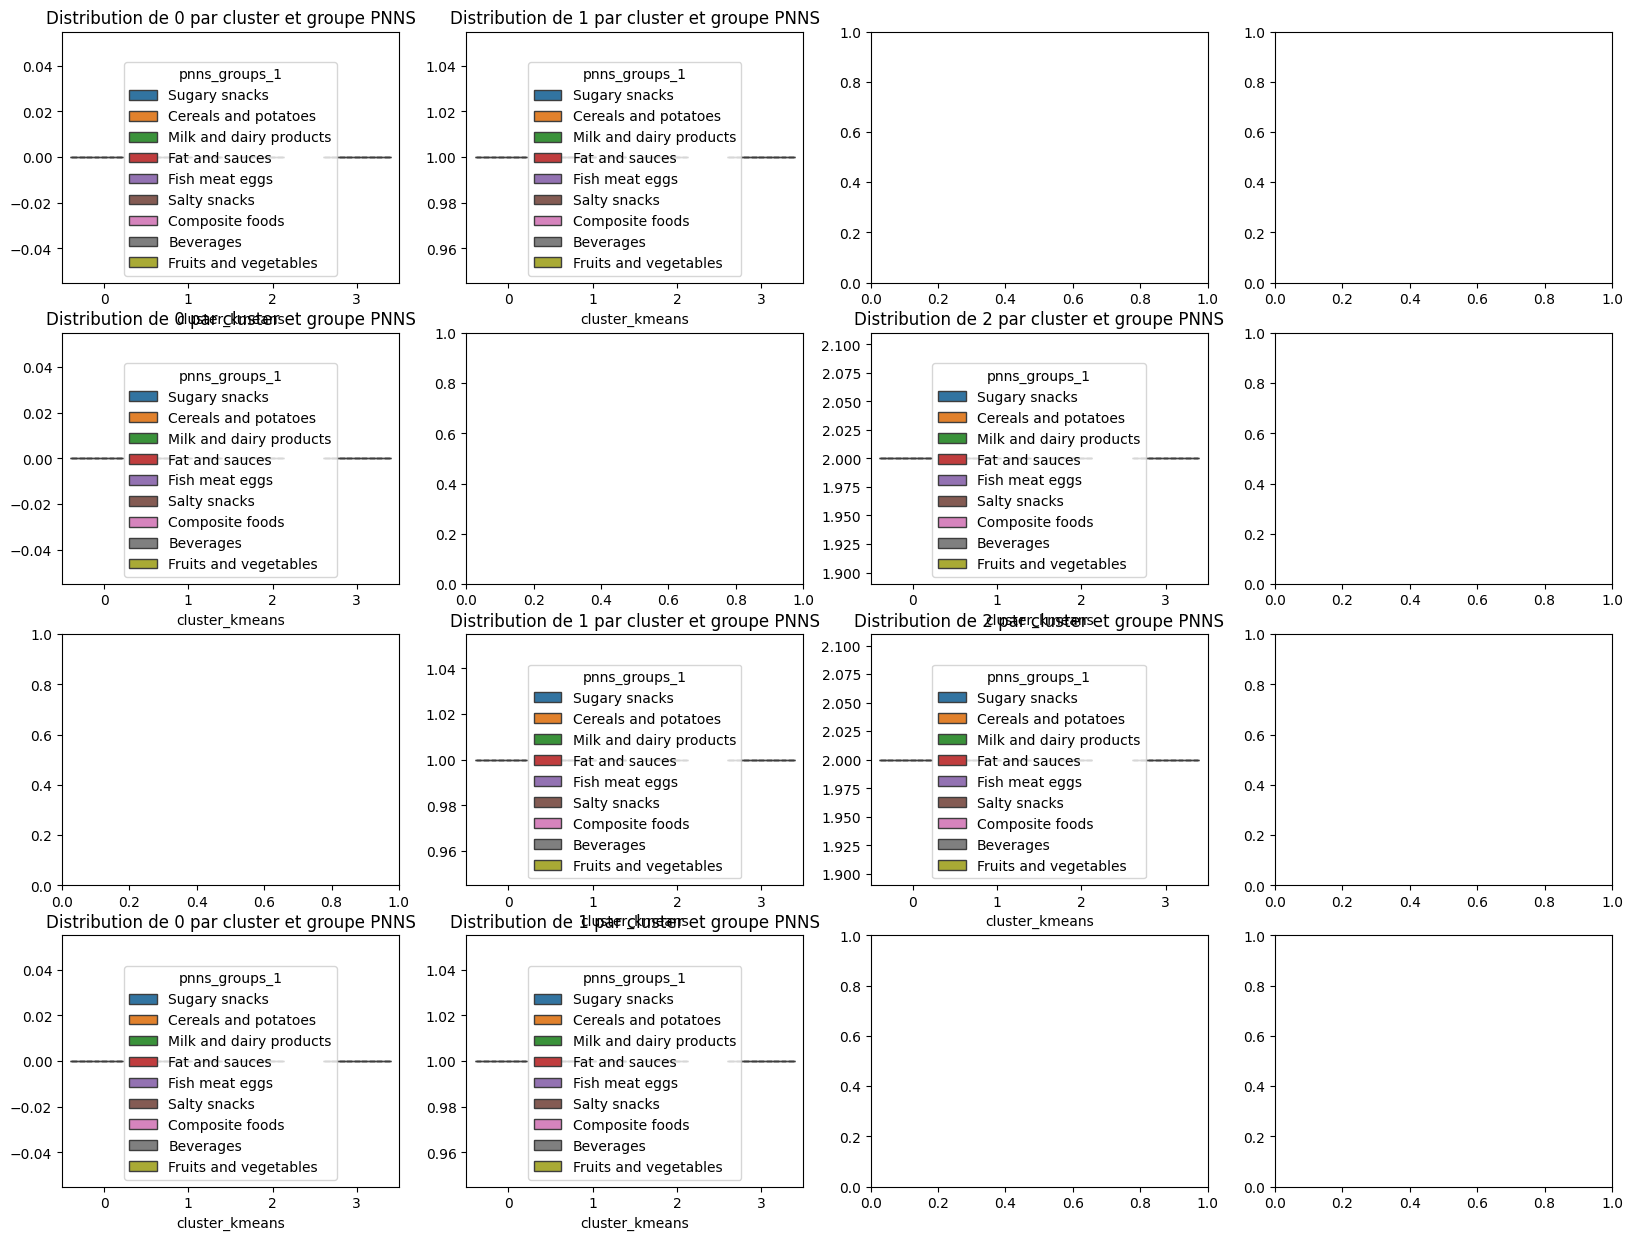

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway

# 1. Statistiques descriptives par cluster et groupe PNNS
print("\nStatistiques descriptives par cluster et groupe PNNS:")
print(df9_kmeans.groupby(['cluster_kmeans', 'pnns_groups_1'])[colonnes_numeriques].describe().to_markdown(numalign="left", stralign="left"))

# 2. Visualisation des clusters (boxplots regroupés)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i, col in enumerate(colonnes_numeriques):
    row = i // 2
    col = i % 3
    sns.boxplot(data=df9_kmeans, x='cluster_kmeans', y=col, hue='pnns_groups_1', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution de {col} par cluster et groupe PNNS')
plt.tight_layout()
plt.show()

# 3. Identification des variables importantes pour chaque cluster (moyennes par cluster)
cluster_means = df9_kmeans.groupby('cluster_kmeans')[colonnes_numeriques].mean()
for cluster in range(kmeans.n_clusters):
    print(f"\nVariables importantes pour le cluster {cluster} :")
    print(cluster_means.loc[cluster].sort_values(ascending=False)[:5].to_markdown(numalign="left", stralign="left"))

# 4. Évaluation de la qualité du clustering (silhouette score)
silhouette_avg = silhouette_score(X9, kmeans.labels_)
print(f"\nCoefficient de silhouette moyen : {silhouette_avg:.3f}")

# 5. Recherche du nombre optimal de clusters (méthode du coude)
inertia = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X9)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude pour le choix du nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

# 6. ANOVA pour chaque variable numérique
for col in colonnes_numeriques:
    groups = [df9_kmeans[df9_kmeans['cluster_kmeans']==i][col] for i in range(kmeans.n_clusters)]
    statistic, pvalue = f_oneway(*groups)
    print(f"\nANOVA pour {col} :")
    print(f"  Statistique F : {statistic:.3f}")
    print(f"  Valeur p : {pvalue:.3f}")


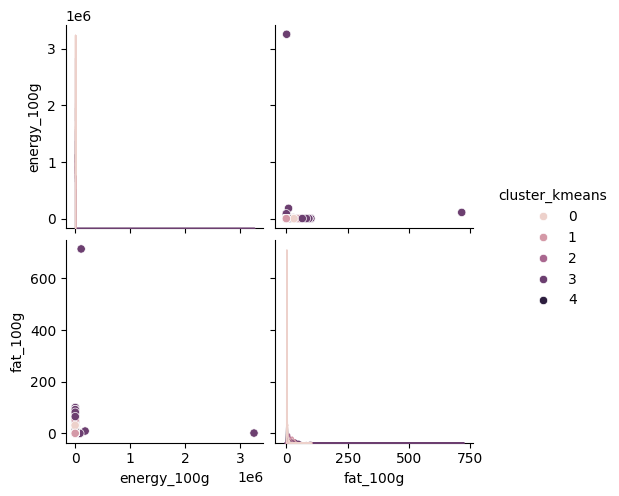

Statistiques descriptives par cluster:
|   cluster_kmeans |   ('energy_100g', 'count') |   ('energy_100g', 'mean') |   ('energy_100g', 'std') |   ('energy_100g', 'min') |   ('energy_100g', '25%') |   ('energy_100g', '50%') |   ('energy_100g', '75%') |   ('energy_100g', 'max') |   ('fat_100g', 'count') |   ('fat_100g', 'mean') |   ('fat_100g', 'std') |   ('fat_100g', 'min') |   ('fat_100g', '25%') |   ('fat_100g', '50%') |   ('fat_100g', '75%') |   ('fat_100g', 'max') |   ('saturated-fat_100g', 'count') |   ('saturated-fat_100g', 'mean') |   ('saturated-fat_100g', 'std') |   ('saturated-fat_100g', 'min') |   ('saturated-fat_100g', '25%') |   ('saturated-fat_100g', '50%') |   ('saturated-fat_100g', '75%') |   ('saturated-fat_100g', 'max') |   ('trans-fat_100g', 'count') |   ('trans-fat_100g', 'mean') |   ('trans-fat_100g', 'std') |   ('trans-fat_100g', 'min') |   ('trans-fat_100g', '25%') |   ('trans-fat_100g', '50%') |   ('trans-fat_100g', '75%') |   ('trans-fat_100g', 'max') |   ('chol

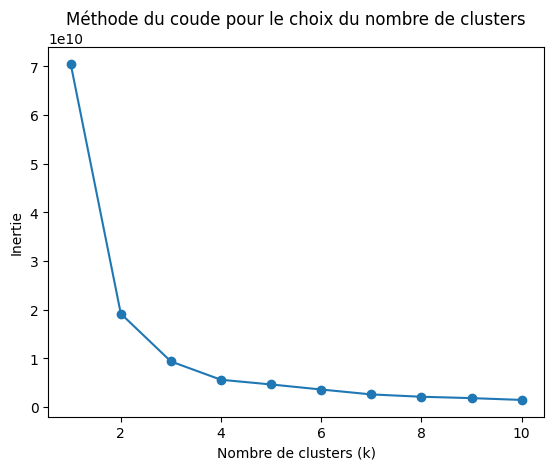

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# 1. Visualisation et description statistique :

# Visualisation des clusters (exemple avec 2 colonnes numériques)
sns.pairplot(df9_kmeans, hue='cluster_kmeans', vars=colonnes_numeriques[:2])  # Choisissez 2 colonnes pour le graphique
plt.show()

# Description statistique des clusters
print("Statistiques descriptives par cluster:")
print(df9_kmeans.groupby('cluster_kmeans')[colonnes_numeriques].describe().to_markdown())

# 2. Évaluation de la qualité du clustering :

# Calcul du coefficient de silhouette (plus il est proche de 1, meilleure est la qualité)
silhouette_avg = silhouette_score(X9, kmeans.labels_)
print(f"\nCoefficient de silhouette moyen: {silhouette_avg:.3f}")

# 3. Choix du nombre de clusters (méthode du coude) :

inertia = []
for k in range(1, 11):  # Testez différentes valeurs de k
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X9)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude pour le choix du nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()